<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span><ul class="toc-item"><li><span><a href="#Золото" data-toc-modified-id="Золото-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Золото</a></span></li><li><span><a href="#Серебро" data-toc-modified-id="Серебро-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Серебро</a></span></li><li><span><a href="#Свинец" data-toc-modified-id="Свинец-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Свинец</a></span></li></ul></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li><li><span><a href="#Удаление-аномалий" data-toc-modified-id="Удаление-аномалий-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление аномалий</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

Импортируем бибилиотеки. Прочитаем данные из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test  = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full  = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test  = pd.read_csv('gold_recovery_test_new.csv')
    df_full  = pd.read_csv('gold_recovery_full_new.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Вычислим эффективность обогащения. Для этого создадим функцию

In [6]:
def gold_recovery(c, f, t):
    result = (c *(f - t) / (f*(c - t))) * 100
    return result

Рассчетная эффективность обогащения:

In [7]:
train_recovery = (gold_recovery(df_train['rougher.output.concentrate_au'],
                                df_train['rougher.input.feed_au'],
                                df_train['rougher.output.tail_au'])
                 )

MAE между расчётами и значением признака из таблицы `df_train`:

In [8]:
mean_absolute_error(df_train['rougher.output.recovery'], train_recovery)

9.73512347450521e-15

Значение ошибки очень мало, следовательно значениям в таблице можно верить.

Проанализируем признаки, недоступные в тестовой выборке

In [9]:
df_train[df_train.columns.difference(df_test.columns)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


В тестовой таблице отсутствуют 34 числовых значения. Отсутствуют значения вида **output** (измеряемые по результатам этапов обработки руды) и вида **calculation** (рассчетные значения). Отсутствуют необходимые нам целевые признаки **rougher.output.recovery** и **final.output.recovery**. Очевидно, тестовая таблица содержит только те данные, на основе которых необходимо делать предсказания. В данных также имеются пропуски.

Добавим в тестовую выборку целевые признаки из таблицы `df_full`

In [10]:
df_test = df_test.merge(df_full.loc[:, ['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date')

Заполним пропуски в данных методом ffill.

In [11]:
df_full  = df_full.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_test  = df_test.fillna(method='ffill')

Убедимся, что нет нулевых значений

In [12]:
df_full.isnull().sum().sum()

0

In [13]:
df_full.isnull().sum().sum()

0

In [14]:
df_test.isnull().sum().sum()

0

## Анализ данных

### Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки

#### Золото

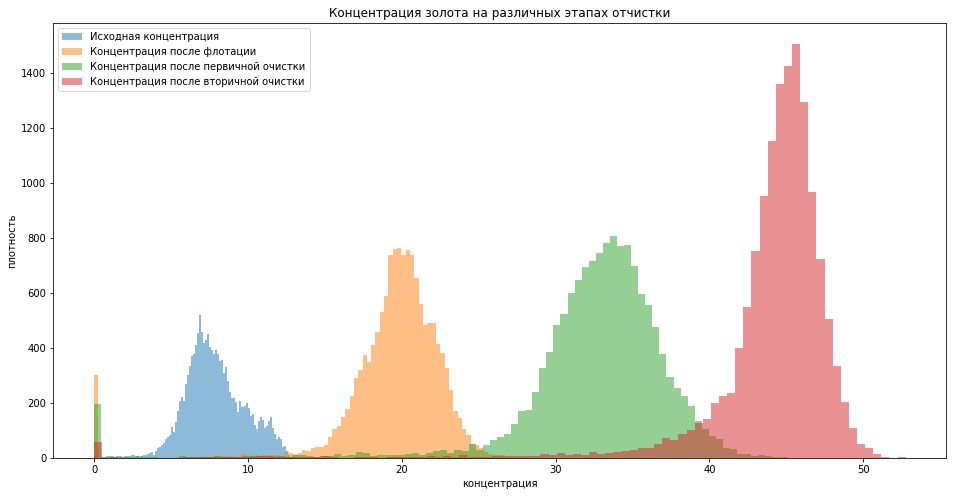

In [15]:
plt.figure(figsize=[16,8])

plt.hist(df_train['rougher.input.feed_au'], bins=100, label = 'Исходная концентрация', alpha=.5)
plt.hist(df_train['rougher.output.concentrate_au'], bins=100, label = 'Концентрация после флотации', alpha=.5)
plt.hist(df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'Концентрация после первичной очистки', alpha=.5)
plt.hist(df_train['final.output.concentrate_au'], bins=100, label = 'Концентрация после вторичной очистки', alpha=.5)
plt.title('Концентрация золота на различных этапах отчистки')
plt.legend()
plt.xlabel("концентрация")
plt.ylabel("плотность")
plt.show()

Концентрация золота повышается с каждым этапом, что соответствует задачам флотации и очисток.

#### Серебро

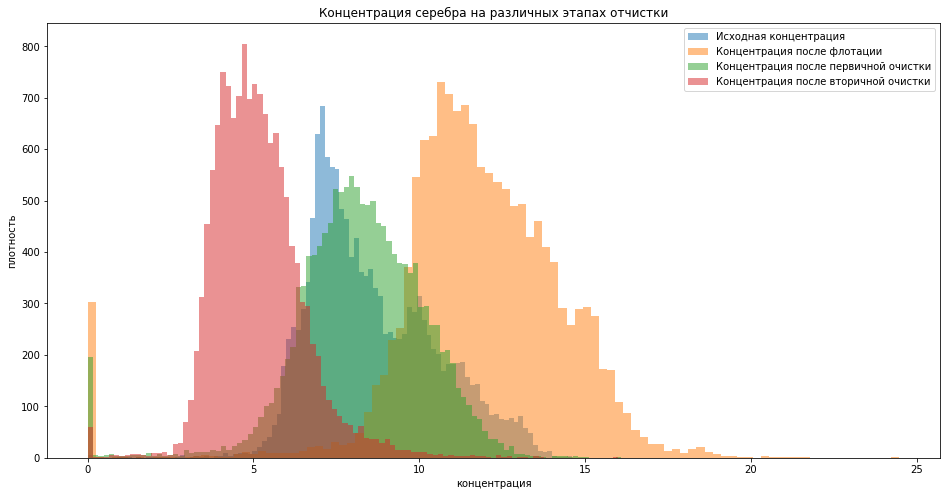

In [16]:
plt.figure(figsize=[16,8])

plt.hist(df_train['rougher.input.feed_ag'], bins=100, label = 'Исходная концентрация', alpha=.5)
plt.hist(df_train['rougher.output.concentrate_ag'], bins=100, label = 'Концентрация после флотации', alpha=.5)
plt.hist(df_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Концентрация после первичной очистки', alpha=.5)
plt.hist(df_train['final.output.concentrate_ag'], bins=100, label = 'Концентрация после вторичной очистки', alpha=.5)
plt.title('Концентрация серебра на различных этапах отчистки')
plt.legend()
plt.xlabel("концентрация")
plt.ylabel("плотность")
plt.show()

Концентрация серебра повышается после флотации, но затем последовательно снижается.

#### Свинец

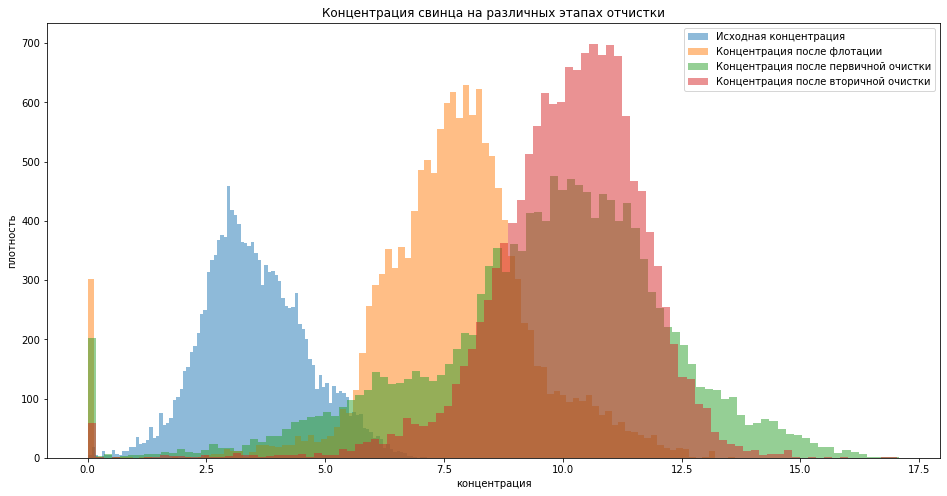

In [17]:
plt.figure(figsize=[16,8])

plt.hist(df_train['rougher.input.feed_pb'], bins=100, label = 'Исходная концентрация', alpha=.5)
plt.hist(df_train['rougher.output.concentrate_pb'], bins=100, label = 'Концентрация после флотации', alpha=.5)
plt.hist(df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Концентрация после первичной очистки', alpha=.5)
plt.hist(df_train['final.output.concentrate_pb'], bins=100, label = 'Концентрация после вторичной очистки', alpha=.5)
plt.title('Концентрация свинца на различных этапах отчистки')
plt.legend()
plt.xlabel("концентрация")
plt.ylabel("плотность")
plt.show()

Концентрация свинца растёт от этапа у этапу

### Распределения размеров гранул сырья на обучающей и тестовой выборках

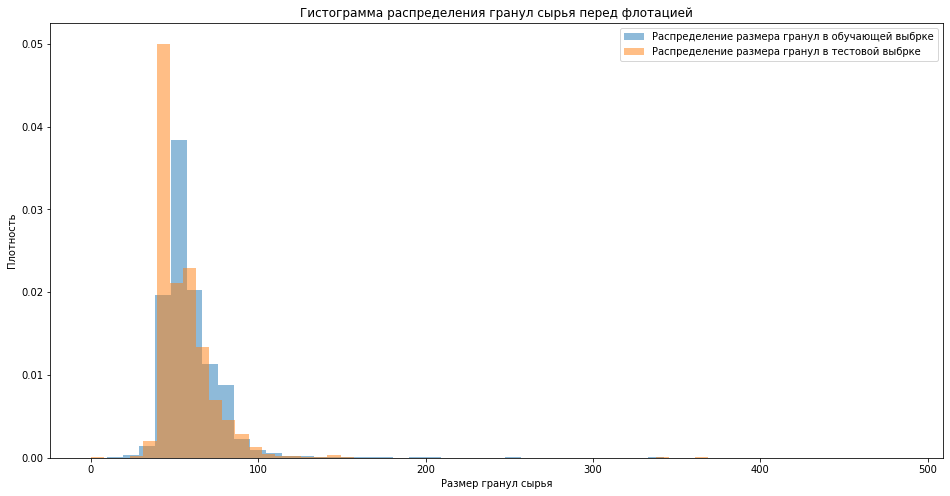

In [18]:
plt.figure(figsize=[16,8])

(plt.hist(df_train['rougher.input.feed_size'], bins=50,
          label = 'Распределение размера гранул в обучающей выбрке', alpha=.5, density=1))

(plt.hist(df_test['rougher.input.feed_size'], bins=50,
          label = 'Распределение размера гранул в тестовой выбрке', alpha=.5, density=1))

plt.xlabel("Размер гранул сырья")
plt.ylabel("Плотность")
plt.legend()
plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

Распределения похожи, поэтому можно считать что оценка модели будет верной

### Исследование суммарной концентрации всех веществ на разных стадиях

In [19]:
df_rougher_in_au_ag_pb = (df_train['rougher.input.feed_au']
                         +df_train['rougher.input.feed_ag']
                         +df_train['rougher.input.feed_pb']
                         +df_train['rougher.input.feed_sol'])

df_rougher_out_au_ag_pb = (df_train['rougher.output.concentrate_au']
                          +df_train['rougher.output.concentrate_ag']
                          +df_train['rougher.output.concentrate_pb']
                          +df_train['rougher.output.concentrate_sol'])

df_primary_au_ag_pb = (df_train['primary_cleaner.output.concentrate_au']
                      +df_train['primary_cleaner.output.concentrate_ag']
                      +df_train['primary_cleaner.output.concentrate_pb']
                      +df_train['primary_cleaner.output.concentrate_sol'])

df_final_au_ag_pb   = (df_train['final.output.concentrate_au']
                      +df_train['final.output.concentrate_ag']
                      +df_train['final.output.concentrate_pb']
                      +df_train['final.output.concentrate_sol'])

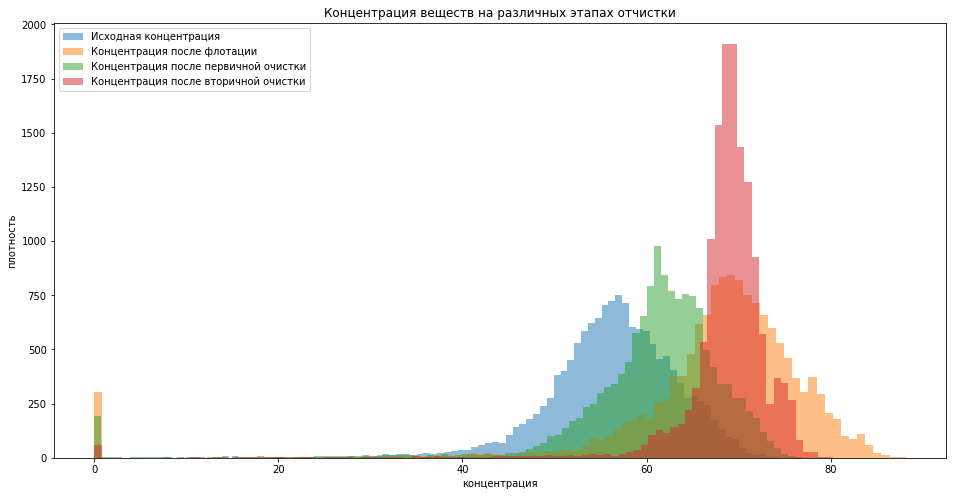

In [20]:
plt.figure(figsize=[16,8])

plt.hist(df_rougher_in_au_ag_pb, bins=100, label = 'Исходная концентрация', alpha=.5)
plt.hist(df_rougher_out_au_ag_pb, bins=100, label = 'Концентрация после флотации', alpha=.5)
plt.hist(df_primary_au_ag_pb, bins=100, label = 'Концентрация после первичной очистки', alpha=.5)
plt.hist(df_final_au_ag_pb, bins=100, label = 'Концентрация после вторичной очистки', alpha=.5)
plt.title('Концентрация веществ на различных этапах отчистки')
plt.legend()
plt.xlabel("концентрация")
plt.ylabel("плотность")
#plt.xlim([0, 10])
#plt.ylim([0, 500])
plt.show()

На этапах флотации и очисток встречаются аномалии в виде некоторого значения околонулевых значений, избавимся от них.

### Удаление аномалий

Удалим значения концентраций веществ менее 1 после флотации и 2-х очисток

In [21]:
columns_with_outliers = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                        'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                         
                        'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
                        'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
                         
                        'final.output.concentrate_au', 'final.output.concentrate_ag', 
                        'final.output.concentrate_pb', 'final.output.concentrate_sol']

In [22]:
for column in columns_with_outliers:
    df_train = df_train.drop(index = df_train[df_train[column] < 1].index, axis = 0)

## Модель

###  Функция для вычисления итоговой sMAPE

Вычисление sMAPE

In [23]:
def sMAPE(y, y_pred):
    smape = np.mean( abs(y - y_pred) / ((abs(y)+abs(y_pred))/2) )*100
    return smape

Итоговый sMAPE:

In [24]:
def sMAPE_sum(sMAPE_rougher, sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

Для предсказания rougher.output.recovery используем только данные из стобцов этапа rougher

Разделим данные в обучающей выборке. Для предсказания **rougher.output.recovery** используем только данные из стобцов этапа `rougher`, а для предсказания **final.output.recovery** данные из всех столбцов кроме `date`

In [25]:
train_features_r = df_train[df_test.columns[12:35]]
train_target_r   = df_train['rougher.output.recovery']

train_features_f = df_train[df_test.columns].drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
train_target_f   = df_train['final.output.recovery']

Данные для теста лучшей модели

In [26]:
test_features_r = df_test[df_test.columns[12:35]]
test_target_r   = df_test['rougher.output.recovery']

test_features_f = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
test_target_f   = df_test['final.output.recovery']

In [27]:
sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

### Обучение моделей

#### Модель линейной регрессии

In [28]:
model_r_LR = LinearRegression()
model_f_LR = LinearRegression()

In [29]:
smape_r_LR = cross_val_score(model_r_LR, train_features_r, train_target_r, scoring=sMAPE_score, cv=5).mean()
smape_r_LR

-6.7824918254052475

In [30]:
smape_f_LR = cross_val_score(model_f_LR, train_features_f, train_target_f, scoring=sMAPE_score, cv=5).mean()
smape_f_LR

-10.78383121153158

Итоговый sMAPE

In [31]:
smape_sum_LR = sMAPE_sum(smape_r_LR, smape_f_LR)
smape_sum_LR

-9.783496364999998

#### Модель решающего дерева

In [32]:
model_r_DR = DecisionTreeRegressor(random_state=12345)

params_DT = {'max_depth':[1, 20]}

grid_r_DT = GridSearchCV(model_r_DR, param_grid = params_DT, scoring=sMAPE_score)
grid_r_DT.fit(train_features_r, train_target_r)
grid_r_DT.best_score_

-7.8297114742524325

In [33]:
smape_r_DR = grid_r_DT.best_score_

In [34]:
grid_r_DT.best_params_

{'max_depth': 1}

In [35]:
model_f_DR = DecisionTreeRegressor(random_state=12345)

grid_f_DT = GridSearchCV(model_f_DR, params_DT, cv=5, scoring=sMAPE_score)
grid_f_DT.fit(train_features_f, train_target_f)
grid_f_DT.best_score_

-9.33813682378338

In [36]:
smape_f_DR = grid_f_DT.best_score_

In [37]:
grid_f_DT.best_params_

{'max_depth': 1}

Итоговый sMAPE

In [38]:
smape_sum_RF = sMAPE_sum(smape_r_DR, smape_f_DR)
smape_sum_RF

-8.961030486400643

#### Модель случайного леса

In [39]:
%%time

model_r_RF = RandomForestRegressor(random_state=12345)

params_RF = {'n_estimators': range (2, 20, 2),
            'max_depth'    : range (1, 10, 1)}

grid_r_RF = GridSearchCV(model_r_RF, params_RF, cv=5, scoring=sMAPE_score)
grid_r_RF.fit(train_features_r, train_target_r)
grid_r_RF.best_score_

CPU times: user 6min 19s, sys: 2.55 s, total: 6min 22s
Wall time: 33min 59s


-6.387331061892537

In [40]:
smape_r_RF = grid_r_RF.best_score_

In [41]:
grid_r_RF.best_params_

{'max_depth': 5, 'n_estimators': 14}

In [46]:
%%time

model_f_RF = RandomForestRegressor(random_state=12345)

grid_f_RF = GridSearchCV(model_f_RF, params_RF, cv=5, scoring=sMAPE_score)
grid_f_RF.fit(train_features_f, train_target_f)
grid_f_RF.best_score_

CPU times: user 13min 50s, sys: 2.64 s, total: 13min 53s
Wall time: 1h 14min 6s


-8.824026464864655

In [47]:
smape_f_RF = grid_f_RF.best_score_

In [48]:
grid_f_RF.best_params_

{'max_depth': 5, 'n_estimators': 4}

Итоговый sMAPE

In [49]:
smape_sum_RF = sMAPE_sum(smape_r_RF, smape_f_RF)
smape_sum_RF

-8.214852614121625

### Проверка лучшей модели на тестовой выборке

Проверим лучшую модель случайного леса на тестовой выборке

In [50]:
best_model_r = grid_r_RF.best_estimator_
best_model_f = grid_f_RF.best_estimator_

test_predicted_r = best_model_r.predict(test_features_r)
test_predicted_f = best_model_f.predict(test_features_f)

sMAPE_r = sMAPE(test_target_r, test_predicted_r)
sMAPE_f = sMAPE(test_target_f, test_predicted_f)

sMAPE_sum(sMAPE_r, sMAPE_f)

9.595181238300562

## Константная модель

Рассчитаем sMAPE для константной модели DummyRegressor

In [51]:
dummy_median_r = DummyRegressor(strategy="median")
dummy_median_f = DummyRegressor(strategy="median")

dummy_median_r.fit(train_features_r, train_target_r)
dummy_median_f.fit(train_features_f, train_target_f)

dummy_predict_r = dummy_median_r.predict(test_features_r)
dummy_predict_f = dummy_median_f.predict(test_features_f)

dummy_sMAPE_r = sMAPE(test_target_r, dummy_predict_r)
dummy_sMAPE_f = sMAPE(test_target_f, dummy_predict_f)

sMAPE_sum(dummy_sMAPE_r, dummy_sMAPE_f)

9.422441042610604

## Вывод

Наилучший результат показала модель случайного леса (RandomForestRegressor), на которой был достигнут показатель sMAPE = 9.6% на тестовой выборке. Тем не менее этот результат не лучше константной модели, основанной на медианных значениях (sMAPE = 9.4%). Таким образом среди проверенных моделей ни одна не предсказывает заметно лучше константной 😿